# The Replicator Dynamics with Examples
### Ashton T. Sperry
#### ashton.sperry@ronininstitute.org

This notebook comes from my frustration of not finding clear tutorials on how to code the replicator dynamics and plot phase diagrams in Python. I use four well-known examples from game theory: the Hawk-Dove game, the Prisoner's Dilemma, the Stag Hunt, and Divide-The-Cake. I picked them to display a variety of stable and unstable equilibria and polymorphisms.

You can find a comprehensive discussion on evolutionary game theory and the replicator dynamics at https://plato.stanford.edu/entries/game-evolutionary/.

Several differential and difference equations are the replicator dynamics. I use a simple difference equation, as described in the encyclopedia article.

In [1]:
"""I use linspace from numpy to create 1000 points that the replicator dynamics
uses to generate changes in population frequencies."""
from numpy import linspace

"""I use seaborn for the pretty visuals for my phase diagrams."""
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
class ReplicatorDynamics:
    """This class contains functions to calculate the difference equation for three examples:
    the Hawk-Dove game, the Prisoner's Dilemma, and the Stag Hunt. They are all related to
    each other; I thus use the traditional nomenclature of the payoffs from the Prisoner's Dilemma."""
    
    def __init__(self, r, s, t, u):
        """t: tempation payoff
           r: reward payoff
           u: punishment payoff (with 'u' instead of 'p')
           s: sucker payoff"""
        self.r = r
        self.s = s
        self.t = t
        self.u = u
        
        """I use linspace to create 1000 points that the difference equation use to generate
        the change in population frequencies."""
        self.p = linspace(0, 1, 1000)
        
    def difference_equation(self):
        """c: the average fitness of the population of doves, cooperators, or stag-hunters
           d: the average fitness of the population of hawks, defectors, or hare-hunters
         pop: the average fitness of the population"""
        c = self.p*self.r + (1-self.p)*self.s
        d = self.p*self.t + (1-self.p)*self.u
        pop = self.p*c + (1-self.p)*d
        
        """The difference equation tracks the change of doves, cooperators, or stag-hunters
        in the population. There are any one of three equilibrium states where p = 0, p = 1,
        or a fraction that represents a polymorphism."""
        diff_eq = self.p*(c-pop)
        
        return self.p, diff_eq

## Background

The Hawk-Dove game, the Prisoner's Dilemma, and the Stag Hunt are related to each other and have the following strategic form:

                  C       D

           C      R       S

           D      T       P

Two players each have the strategies DOVE or HAWK, COOPERATE or DEFECT, or STAG or HARE (all represented by 'C' or 'D'), and the strategic outcomes of REWARD ('R'), SUCKER ('S'), TEMPTATION ('T'), and PUNISHMENT ('P'). We change the payoff values for each outcome in each example.

## The Hawk-Dove Game

Our first example is the Hawk-Dove game. It has the following strategic form:

               DOVE         HAWK

     DOVE      v/2           0

     HAWK       v         (v-c)/2

Recall that our class takes R, S, T, and U as inputs, which, in this case, depends on the value 'v' of the resource and the cost 'c' of fighting. If v < c (the cost of fighting outweighs the value of the resource), then neither DOVE nor HAWK are stable equilibria. It has one stable polymorphism (a mixed equilibrium).

In [3]:
v = 1     #Value of the resource.
c = 2     #Cost of fighting.

"""Set the values of the payoffs."""
r = v/2
s = 0
t = v
u = (v-c)/2

"""Construct the model."""
model = ReplicatorDynamics(r, s, t, u)
p, diff_eq = model.difference_equation()

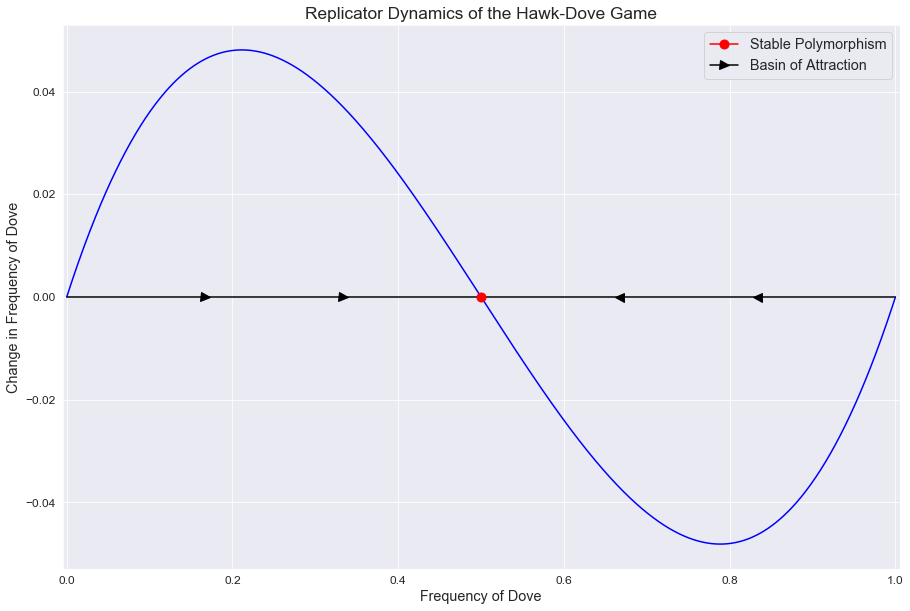

In [4]:
"""You need to finagle plot of the phase diagram."""
fig1 = plt.figure(figsize = (15, 10))

plt.plot(p, diff_eq, color = 'blue')
plt.axhline(xmin = 0.005, xmax = .995, color = 'black')
plt.plot(1-(v/c), 0, marker = 'o', markersize = 9, color = 'red', label = 'Stable Polymorphism')
plt.plot(1/6, 0, marker = '>', markersize = 9, color = 'black', label = 'Basin of Attraction')
plt.plot(2/6, 0, marker = '>', markersize = 9, color = 'black')
plt.plot(4/6, 0, marker = '<', markersize = 9, color = 'black')
plt.plot(5/6, 0, marker = '<', markersize = 9, color = 'black')

plt.xlim(-0.005, 1.005)
#plt.ylim(0, 1)
plt.xlabel('Frequency of Dove', fontsize = 'x-large')
plt.ylabel('Change in Frequency of Dove', fontsize = 'x-large')
plt.title('Replicator Dynamics of the Hawk-Dove Game', fontsize = 'xx-large')
plt.legend(loc = 'best', fontsize = 'x-large')
plt.tick_params(axis = 'both', labelsize = 'large')

plt.show()
fig1.savefig('phase_diagram_hawk_1_2.png', dpi = 300)
plt.close(fig1)

In [5]:
"""Try some difference values to see how the replicator dynamics
of the Hawk-Dove game changes."""
v = 2
c = 3

r = v/2
s = 0
t = v
u = (v-c)/2

model = ReplicatorDynamics(r, s, t, u)
p, diff_eq = model.difference_equation()

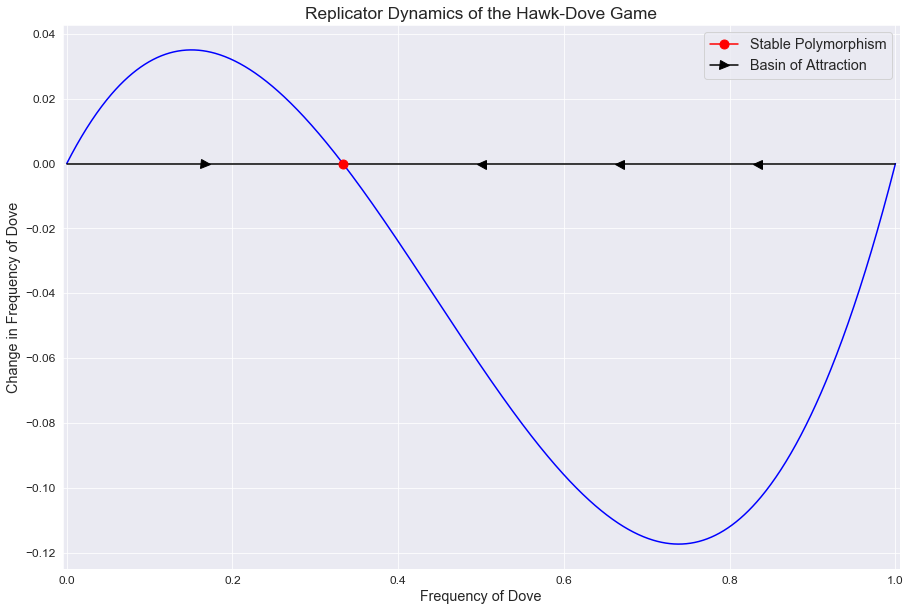

In [6]:
fig2 = plt.figure(figsize = (15, 10))

plt.plot(p, diff_eq, color = 'blue')
plt.axhline(xmin = 0.005, xmax = .995, color = 'black')
plt.plot(1-(v/c), 0, marker = 'o', markersize = 9, color = 'red', label = 'Stable Polymorphism')
plt.plot(1/6, 0, marker = '>', markersize = 9, color = 'black', label = 'Basin of Attraction')
plt.plot(3/6, 0, marker = '<', markersize = 9, color = 'black')
plt.plot(4/6, 0, marker = '<', markersize = 9, color = 'black')
plt.plot(5/6, 0, marker = '<', markersize = 9, color = 'black')

plt.xlim(-0.005, 1.005)
#plt.ylim(0, 1)
plt.xlabel('Frequency of Dove', fontsize = 'x-large')
plt.ylabel('Change in Frequency of Dove', fontsize = 'x-large')
plt.title('Replicator Dynamics of the Hawk-Dove Game', fontsize = 'xx-large')
plt.legend(loc = 'best', fontsize = 'x-large')
plt.tick_params(axis = 'both', labelsize = 'large')

plt.show()
fig2.savefig('phase_diagram_hawk_2_3.png', dpi = 300)
plt.close(fig2)

In [7]:
"""Here is one more change in the values for one more example of the
replicator dynamics of the Hawk-Dove game."""
v = 1
c = 3

r = v/2
s = 0
t = v
u = (v-c)/2

model = ReplicatorDynamics(r, s, t, u)
p, diff_eq = model.difference_equation()

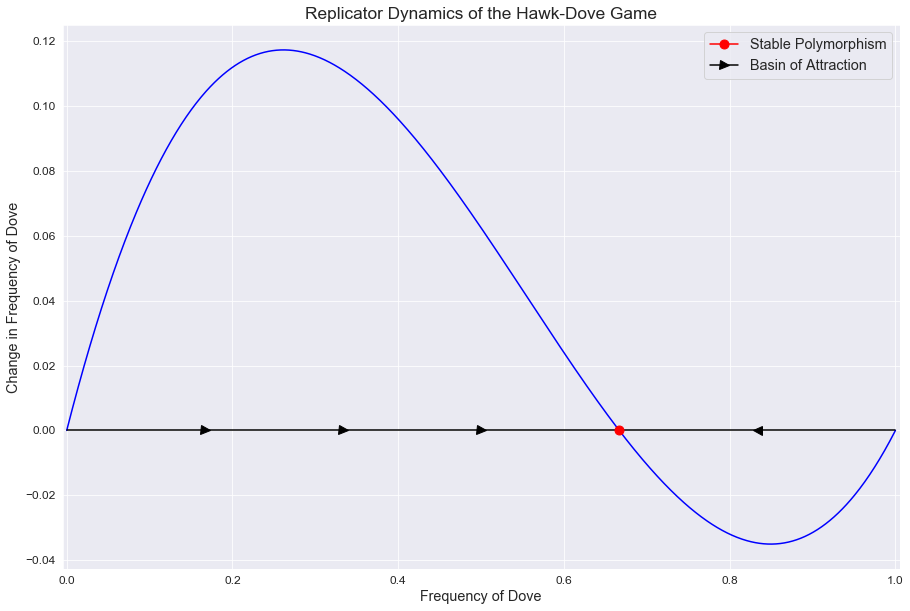

In [8]:
fig3 = plt.figure(figsize = (15, 10))

plt.plot(p, diff_eq, color = 'blue')
plt.axhline(xmin = 0.005, xmax = .995, color = 'black')
plt.plot(1-(v/c), 0, marker = 'o', markersize = 9, color = 'red', label = 'Stable Polymorphism')
plt.plot(1/6, 0, marker = '>', markersize = 9, color = 'black', label = 'Basin of Attraction')
plt.plot(2/6, 0, marker = '>', markersize = 9, color = 'black')
plt.plot(3/6, 0, marker = '>', markersize = 9, color = 'black')
plt.plot(5/6, 0, marker = '<', markersize = 9, color = 'black')

plt.xlim(-0.005, 1.005)
#plt.ylim(0, 1)
plt.xlabel('Frequency of Dove', fontsize = 'x-large')
plt.ylabel('Change in Frequency of Dove', fontsize = 'x-large')
plt.title('Replicator Dynamics of the Hawk-Dove Game', fontsize = 'xx-large')
plt.legend(loc = 'best', fontsize = 'x-large')
plt.tick_params(axis = 'both', labelsize = 'large')

plt.show()
fig3.savefig('phase_diagram_hawk_1_3.png', dpi = 300)
plt.close(fig3)

## The Prisoner's Dilemma

Our second example is the Prisoner's Dilemma. It has the following strategic form:

                  COOPERATE       DEFECT

     COOPERATE       R              S

     DEFECT          T              U

Our class takes R, S, T, and U as inputs. It has one stable equilibrium (DEFECT).

In [9]:
r = 2
s = 0
t = 3
u = 1

model = ReplicatorDynamics(r, s, t, u)
p, diff_eq = model.difference_equation()

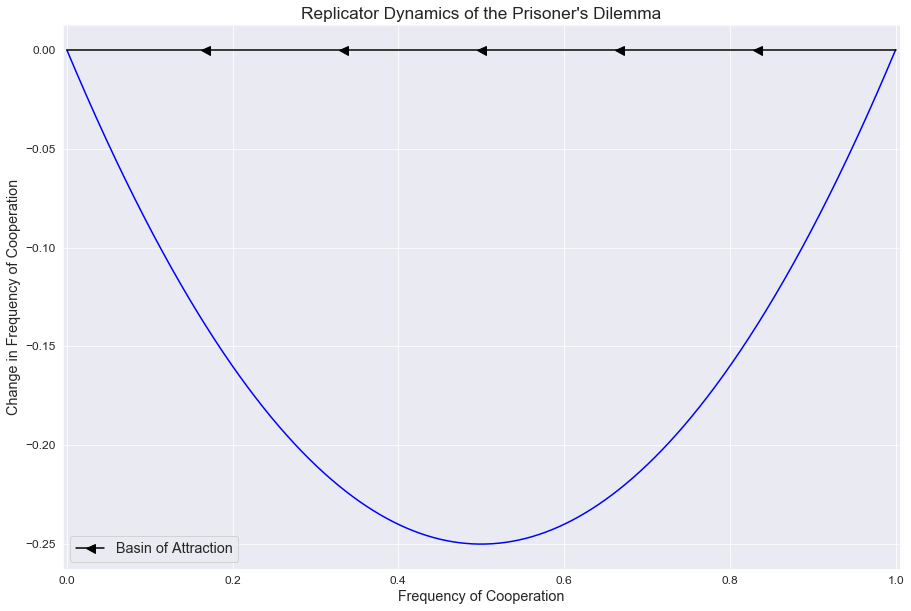

In [10]:
"""Finagle as before."""
fig4 = plt.figure(figsize = (15, 10))

plt.plot(p, diff_eq, color = 'blue')
plt.axhline(xmin = 0.005, xmax = .995, color = 'black')
plt.plot(1/6, 0, marker = '<', markersize = 9, color = 'black', label = 'Basin of Attraction')
plt.plot(2/6, 0, marker = '<', markersize = 9, color = 'black')
plt.plot(3/6, 0, marker = '<', markersize = 9, color = 'black')
plt.plot(4/6, 0, marker = '<', markersize = 9, color = 'black')
plt.plot(5/6, 0, marker = '<', markersize = 9, color = 'black')

plt.xlim(-0.005, 1.005)
#plt.ylim(-0.25, 0.10)
plt.xlabel('Frequency of Cooperation', fontsize = 'x-large')
plt.ylabel('Change in Frequency of Cooperation', fontsize = 'x-large')
plt.title("Replicator Dynamics of the Prisoner's Dilemma", fontsize = 'xx-large')
plt.legend(loc = 'best', fontsize = 'x-large')
plt.tick_params(axis = 'both', labelsize = 'large')

plt.show()
fig4.savefig('phase_diagram_prisoners.png', dpi = 300)
plt.close(fig4)

## The Stag Hunt

Our third example is the Stag Hunt. It has the following strategic form:

               STAG         HARE

     STAG       R            0

     HARE       T            T

Our class takes R, S, T, and U as inputs. It has two stable equilibria (STAG and HARE), and one unstable polymorphism.

In [11]:
r = 3
s = 0
t = 2
u = t

model = ReplicatorDynamics(r, s, t, u)
p, diff_eq = model.difference_equation()

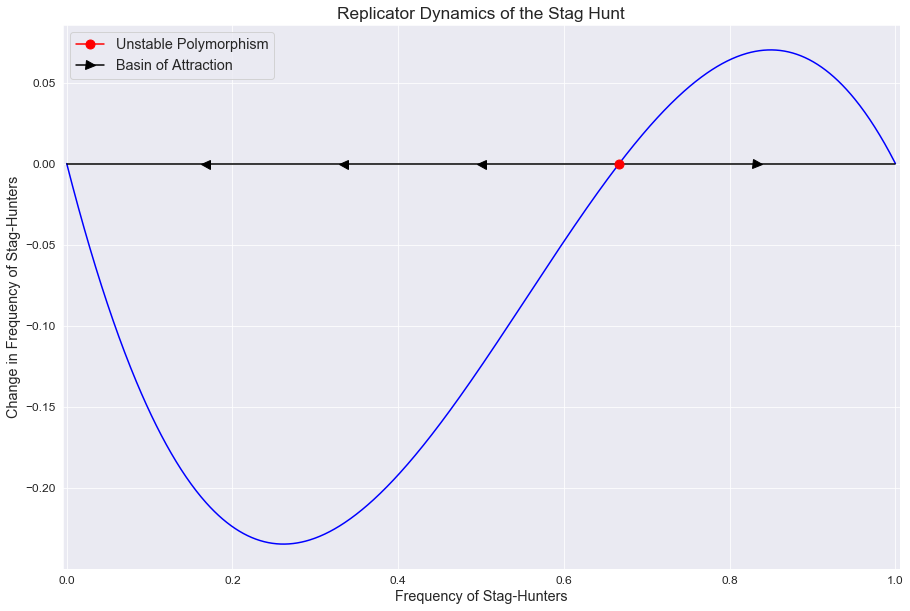

In [12]:
"""Finagle as before."""
fig5 = plt.figure(figsize = (15, 10))

plt.plot(p, diff_eq, color = 'blue')
plt.axhline(xmin = 0.005, xmax = .995, color = 'black')
plt.plot(2/3, 0, marker = 'o', markersize = 9, color = 'red', label = 'Unstable Polymorphism')
plt.plot(1/6, 0, marker = '<', markersize = 9, color = 'black')
plt.plot(2/6, 0, marker = '<', markersize = 9, color = 'black')
plt.plot(3/6, 0, marker = '<', markersize = 9, color = 'black')
plt.plot(5/6, 0, marker = '>', markersize = 9, color = 'black', label = 'Basin of Attraction')

plt.xlim(-0.005, 1.005)
#plt.ylim(-0.25, 0.10)
plt.xlabel('Frequency of Stag-Hunters', fontsize = 'x-large')
plt.ylabel('Change in Frequency of Stag-Hunters', fontsize = 'x-large')
plt.title('Replicator Dynamics of the Stag Hunt', fontsize = 'xx-large')
plt.legend(loc = 'best', fontsize = 'x-large')
plt.tick_params(axis = 'both', labelsize = 'large')

plt.show()
fig5.savefig('phase_diagram_stag_3_2.png', dpi = 300)
plt.close(fig5)

In [13]:
"""Try some new values to test how the replicator dynamics of the Stag Hunt changes."""
r = 3
s = 0
t = 1
u = t

model = ReplicatorDynamics(r, s, t, u)
p, diff_eq = model.difference_equation()

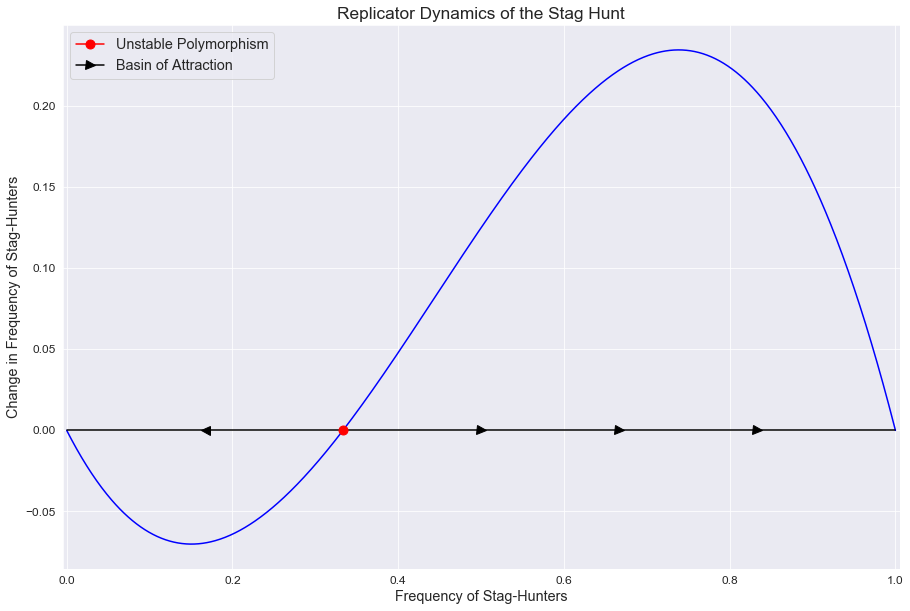

In [14]:
fig6 = plt.figure(figsize = (15, 10))

plt.plot(p, diff_eq, color = 'blue')
plt.axhline(xmin = 0.005, xmax = .995, color = 'black')
plt.plot(1/3, 0, marker = 'o', markersize = 9, color = 'red', label = 'Unstable Polymorphism')
plt.plot(1/6, 0, marker = '<', markersize = 9, color = 'black')
plt.plot(3/6, 0, marker = '>', markersize = 9, color = 'black')
plt.plot(4/6, 0, marker = '>', markersize = 9, color = 'black')
plt.plot(5/6, 0, marker = '>', markersize = 9, color = 'black', label = 'Basin of Attraction')

plt.xlim(-0.005, 1.005)
#plt.ylim(-0.10, 0.25)
plt.xlabel('Frequency of Stag-Hunters', fontsize = 'x-large')
plt.ylabel('Change in Frequency of Stag-Hunters', fontsize = 'x-large')
plt.title('Replicator Dynamics of the Stag Hunt', fontsize = 'xx-large')
plt.legend(loc = 'best', fontsize = 'x-large')
plt.tick_params(axis = 'both', labelsize = 'large')

plt.show()
fig6.savefig('phase_diagram_stag_3_1.png', dpi = 300)
plt.close(fig6)

## Divide-The-Cake

Our fourth example is Divide-The-Cake, which is a three-by-three strategic form game. The replicator dynamics is
more complicated and has a ternary or simplex phase diagram.

                  1/3           1/2           2/3
             
    1/3        1/3, 1/3      1/3, 1/2       1/3, 2/3
    1/2        1/2, 1/3      1/2, 1/2         0, 0
    2/3        2/3, 1/3        0, 0           0, 0
    
There are three equilibria: (1/3, 2/3), (1/2, 1/2), (2/3, 1/3). The second is a stable equilibrium, along with one stable polymorphism. I use a simpler version for the phase diagram:

                  1/3           1/2           2/3
             
    1/3           1/3           1/3           1/3
    1/2           1/2           1/2            0
    2/3           2/3            0             0

In [15]:
"""egtplot is an excellent library for ternary phase diagrams. It can plot static
or animated versions of a phase diagram."""
from egtplot import plot_static

You can find the library at https://github.com/mirzaevinom/egtplot.

1it [00:00,  4.05it/s]


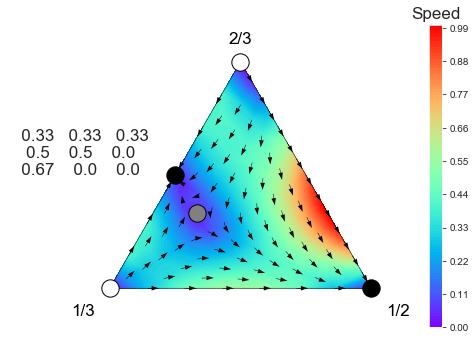

In [18]:
"""I use the simpler strategic form of Divide-The-Cake as a list of lists."""
matrix = [[1/3], [1/3], [1/3], [1/2], [1/2], [0], [2/3], [0], [0]]

"""The vertices are labeled in a counterclockwise fashion. Black circles represent
stable equilibria, white circles represent unstable equilibria, and gray circles
represent unstable polymorphisms."""
simplex = plot_static(matrix, background = True, vert_labels = ['1/3', '1/2', '2/3'])

You can "control" click the simplex to save it as a png file.